# Potentials #

This notebook is used to plot the potential of companion axion models.

In [ ]:
from potential import *
from tqdm import tqdm

## Companion Axion Potential ##

This section is used to plot the potential of companion axion models.

In [ ]:
# Generate models with integer colour anomaly coefficients ranging from 1 to 3.
model_configs = generate_models(1, 3)

# Plot the potential of the above models and save as pngs
for (n, n_prime, m, m_prime) in tqdm(model_configs):
    current_fig, _ = plot_axion_potential_phase_only(
        n, n_prime, m, m_prime, 0.025, 0.04, num_samples=2000, num_levels=15
    )
    current_fig.savefig(f"N{n}{n_prime}{m}{m_prime} Companion Axion Potential.png")
    plt.close(current_fig)

In [ ]:
# Generate models with integer colour anomaly coefficients ranging from 1 to 3.
model_configs = generate_models(1, 3)

# Display buffer so progress bar works
display_strings = []

for (n, n_prime, m, m_prime) in tqdm(model_configs):
    # Get the number of unique minima
    minima_count = count_unique_minima(n, n_prime, m, m_prime, 0.025, 1, num_samples=2000, tolerance=0.3)
    display_strings.append(f"N{n}{n_prime}{m}{m_prime} has {minima_count} degenerate minima")

print(*display_strings, sep="\n")

## Single Axion Potential ##

This section can be used to create plots of the single axion potential.

In [12]:
from cosmotd.single_axion import potential_sa_axion_only
from matplotlib import pyplot as plt
import numpy as np

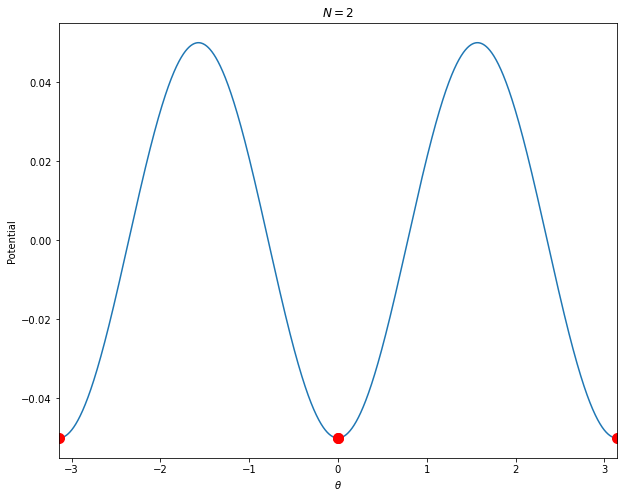

In [27]:
n = 2
K = 0.025

phi_phase = np.linspace(-np.pi, +np.pi, 2000)
sa_potential = potential_sa_axion_only(phi_phase, n, K)

%matplotlib inline
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()

ax.plot(phi_phase, sa_potential, zorder=0)
ax.set_title(rf"$N={n}$")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel("Potential")
ax.set_xlim(-np.pi, +np.pi)

min_indices = np.argwhere(np.isclose(sa_potential, -2 * K))

for min_idx in min_indices:
    ax.scatter(phi_phase[min_idx], sa_potential[min_idx], 100, "r", zorder=1)